# Traffic Sign Classifier Project

![Traffic](sign.jpg)

The following is the document containing the information used to analyze and create a convolutional neural network model to classify and predict Traffic Signs.


We will be using the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

In [2]:
# Load pickled data
import pickle

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_non_normalized, y_train_non_normalized = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print(len(X_train_non_normalized))
print(len(X_test))

39209
12630


In [3]:
from sklearn.model_selection import train_test_split

X_train_non_normalized, X_validation, y_train_non_normalized, y_validation = train_test_split(X_train_non_normalized, y_train_non_normalized, test_size=0.2, random_state=0)

print("Updated Image Shape: {}".format(X_train_non_normalized[0].shape))

Updated Image Shape: (32, 32, 3)


In [4]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

X_train = []
y_train = []
all_images = dict()
images = dict()
for i, (image, label) in enumerate(zip(X_train_non_normalized, y_train_non_normalized)):
    if label not in all_images:
        all_images[label] = []
    zeros = np.zeros((32,32,3))
    norm_image = cv2.normalize(image, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    X_train.append(norm_image)
    y_train.append(label)
    images[label] = norm_image
    all_images[label].append(norm_image)

# Dataset Summary

> Student performs basic data summary.

The data contained we use is the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset), it contains 43 types of real traffic signs from Germany, in this part we will analyze the type of traffic signs that we will be analyzing and searching the differences between each instance.

# Exploratory Visualization

> Student performs an exploratory visualization on the dataset.

We should see what each label represents visually to have a better idea the types of images we are dealing with. To do this we extract to pieces from the training data. 

 1. A dictionary of label and one normalized images, this would allow us to visualize all the labels
 2. A dictionary of label and an array of normalized images, this would allow us to see a small sample and what are the difference between one image to another.

We also want to see how similar are each of the images in one label, to do that we get a sample for each label. We also want to know which is the most common label. To do this we sort our labels and images according to the amount of images in our training set and this allows us to discover the following:

```
[(37, 161), (0, 169), (19, 176), (41, 186), (27, 193), (42, 195), (32, 201), (24, 203), (29, 212), (39, 235), (21, 261), (20, 286), (40, 289), (22, 313), (36, 317), (16, 329), (6, 332), (34, 348), (30, 349), (23, 411), (28, 415), (26, 467), (15, 513), (33, 576), (14, 614), (31, 623), (17, 884), (18, 982), (35, 983), (11, 1040), (3, 1134), (7, 1143), (8, 1147), (25, 1181), (9, 1189), (5, 1485), (4, 1578), (10, 1619), (38, 1627), (12, 1691), (13, 1730), (1, 1781), (2, 1799)]
```

We can observe that label 2 is our most common label in the training data and label 37 and 0 have very few samples.

We know what each label looks like now but it's time to see how is each label similar to one another.

The dataset seems great as we can see, there are multiple permutations of the same image in different brightness, zoom, and blur.

As a final step of our preprocessing we shuffle the images and remove the image dictionary to free some memory.

# Preprocessing

> Students provides sufficient details of the preprocessing techniques used. Additionally, the student discusses why the techniques were chosen.

We will be setting apart 20% of the dataset for validation and only running it once after we have trained and tested our model.

### Zero mean

To condition our problem for analysis we need to have as Zero Mean as possible so that the optimizer can have it easily to decrease the variance in its job. Since we are dealing with images we could just substract 128 and divide by 128 each channel of the image, but thankfully opencv already has a tool to do this for us.

`cv2.normalize(image, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)`

This normalizes our images for our optimizer. We don't normalize to grayscale to observe the behavior.


### Shuffling the images

To end our preprocessing we will shuffle the images in our dataset.

43


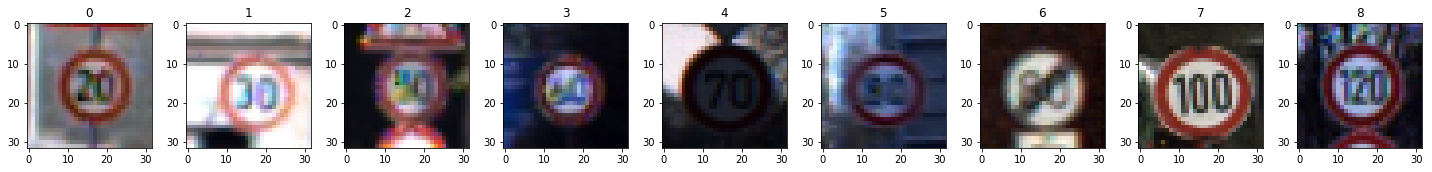

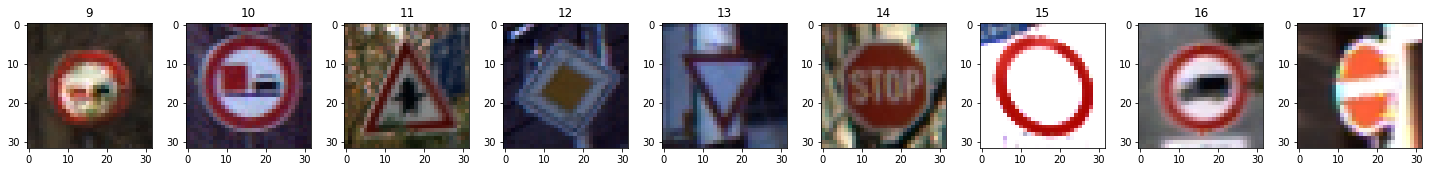

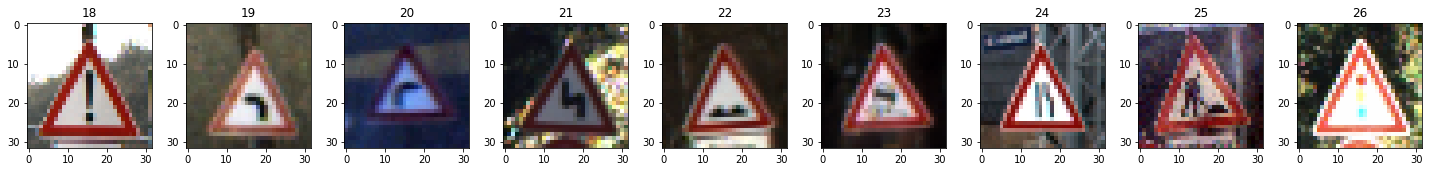

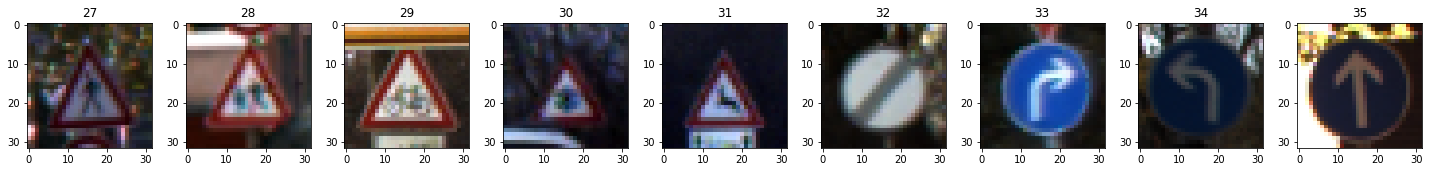

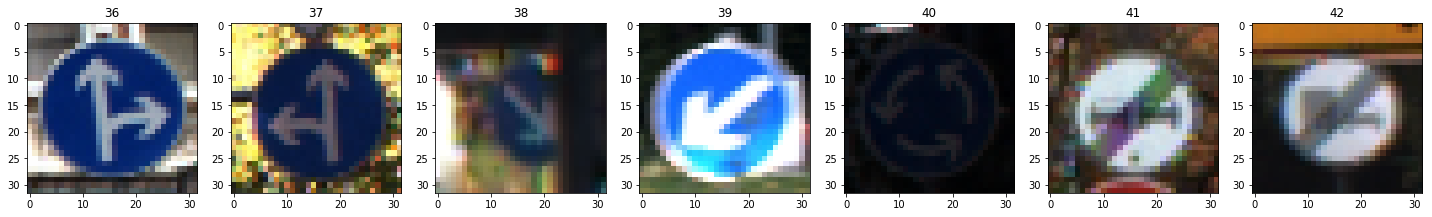

In [4]:

mini_batch_size = 9
images_labels = list(images.keys())
print(len(images_labels))
for start in range(0, len(images_labels), mini_batch_size): 
    end = start+mini_batch_size 
    end = end if end < len(images_labels) else len(images_labels)
    mini_batch_size = end - start
    fig, axes = plt.subplots(1,mini_batch_size)
    for i, (label, ax) in enumerate(zip(images_labels[start:end], axes)):
        ax.set_title(label)
        ax.imshow(images[label].squeeze())

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

images.clear()

In [5]:
images_labels = list(all_images.keys())
images_labels = [(key, len(all_images[key])) for key in images_labels]
images_labels = sorted(images_labels, key=lambda x: x[1])
print(images_labels)

[(37, 161), (0, 169), (19, 176), (41, 186), (27, 193), (42, 195), (32, 201), (24, 203), (29, 212), (39, 235), (21, 261), (20, 286), (40, 289), (22, 313), (36, 317), (16, 329), (6, 332), (34, 348), (30, 349), (23, 411), (28, 415), (26, 467), (15, 513), (33, 576), (14, 614), (31, 623), (17, 884), (18, 982), (35, 983), (11, 1040), (3, 1134), (7, 1143), (8, 1147), (25, 1181), (9, 1189), (5, 1485), (4, 1578), (10, 1619), (38, 1627), (12, 1691), (13, 1730), (1, 1781), (2, 1799)]


169


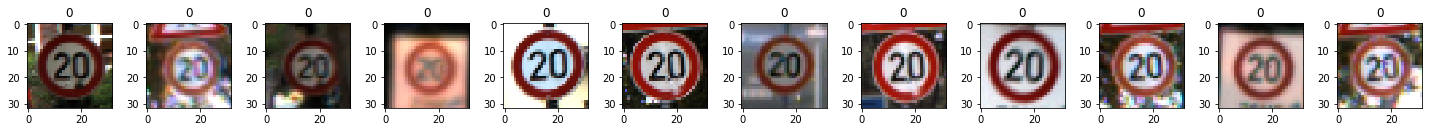

1781


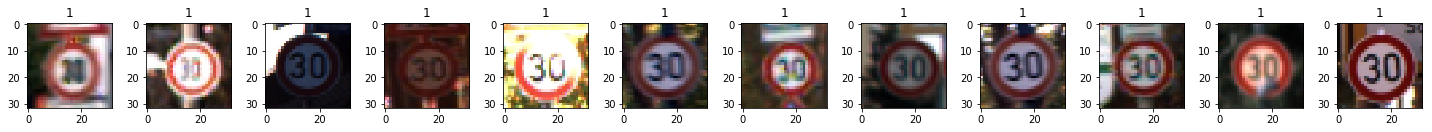

1799


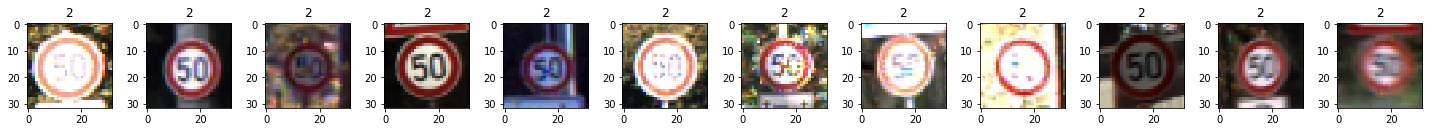

1134


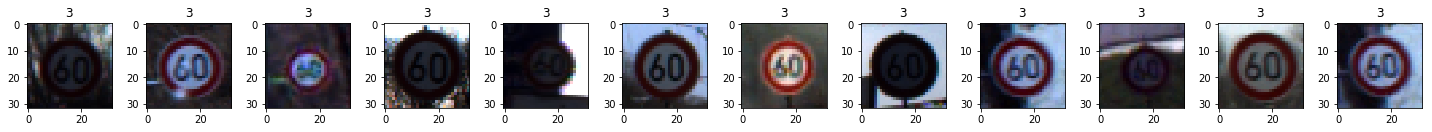

1578


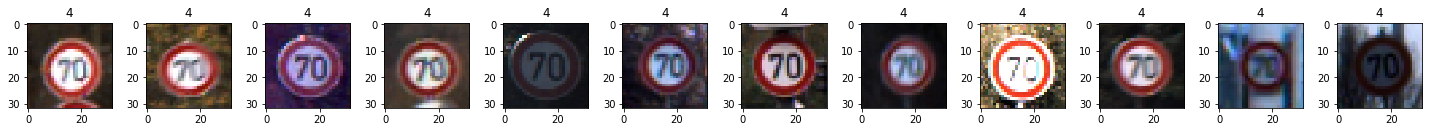

1485


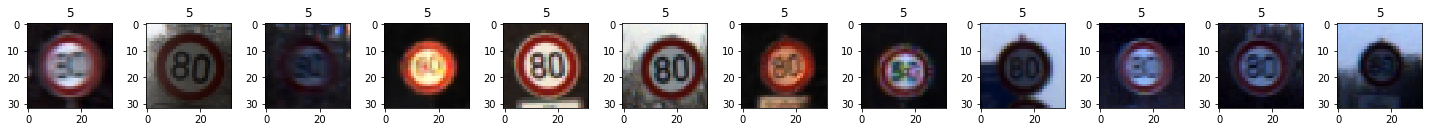

332


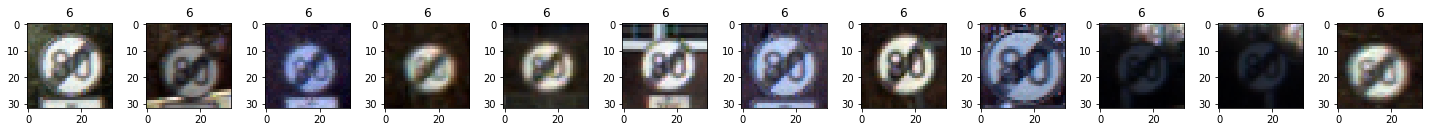

1143


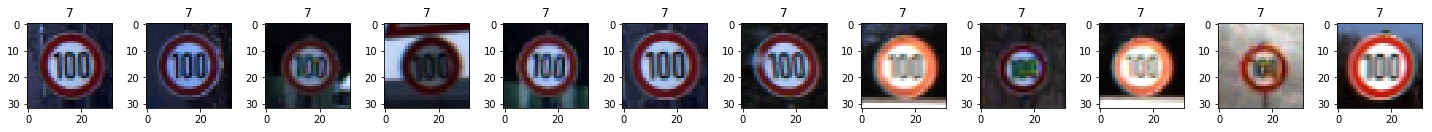

1147


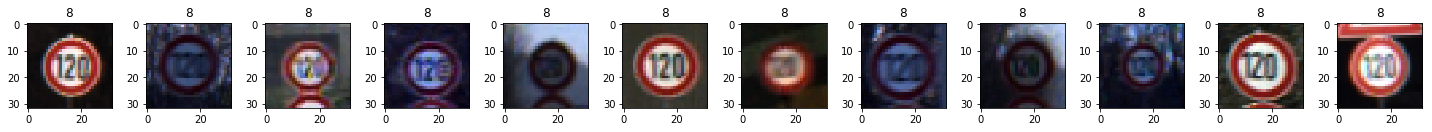

1189


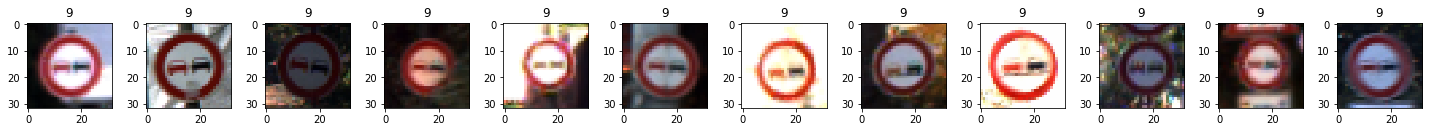

1619


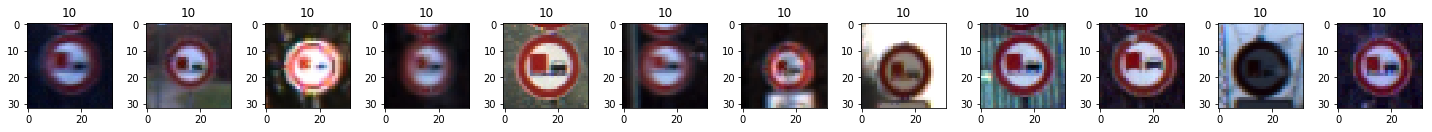

1040


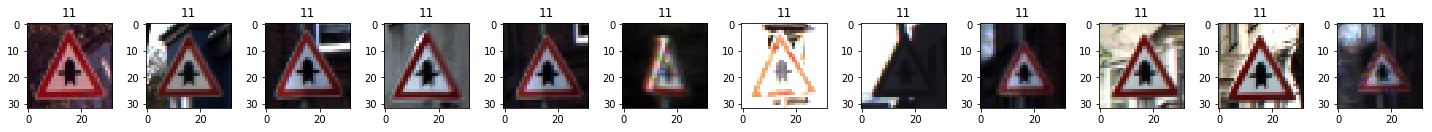

1691


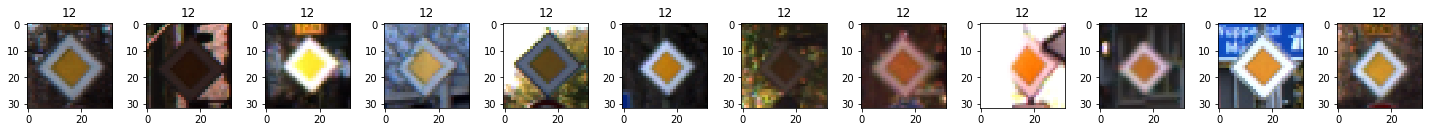

1730


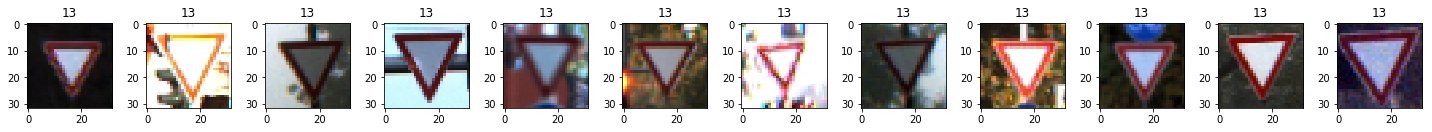

614


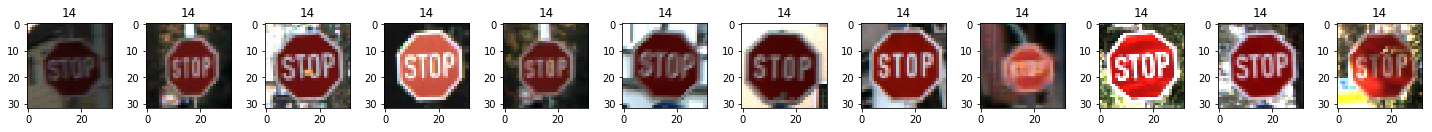

513


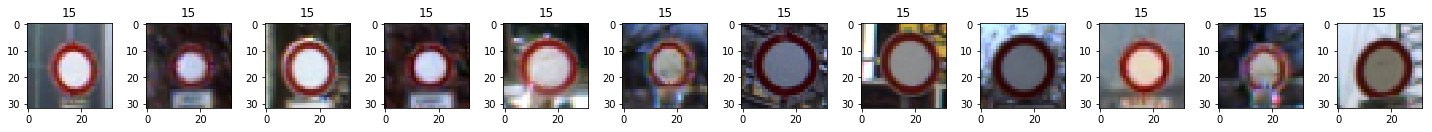

329


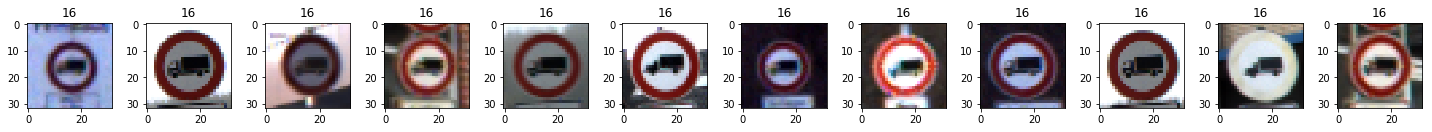

884


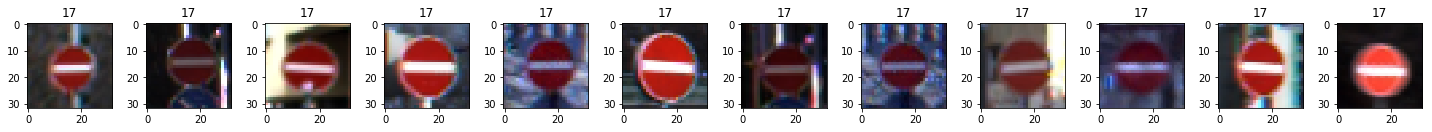

982


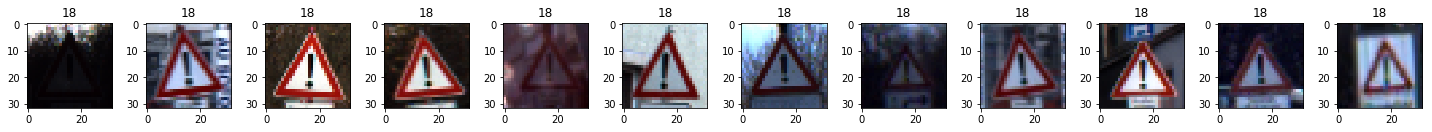

176


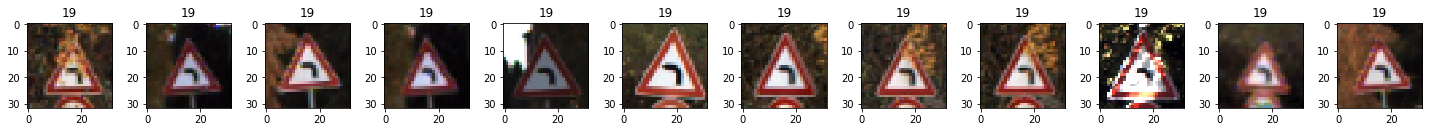

286


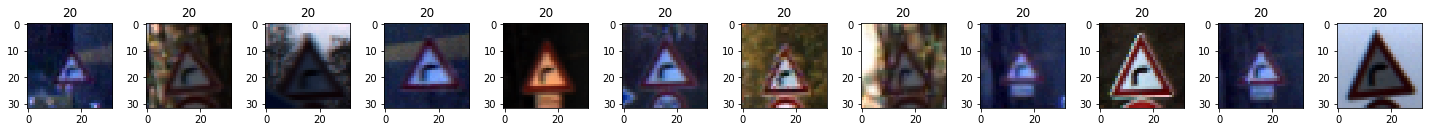

261


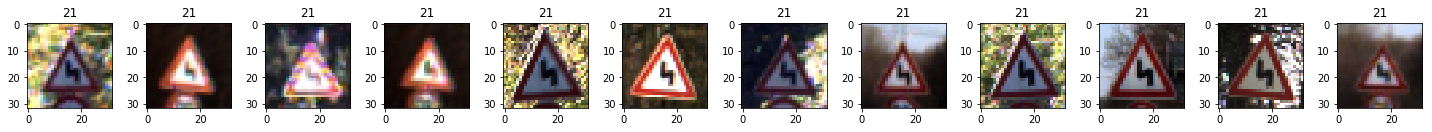

313


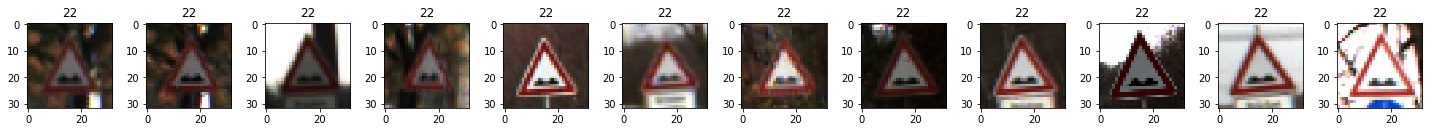

411


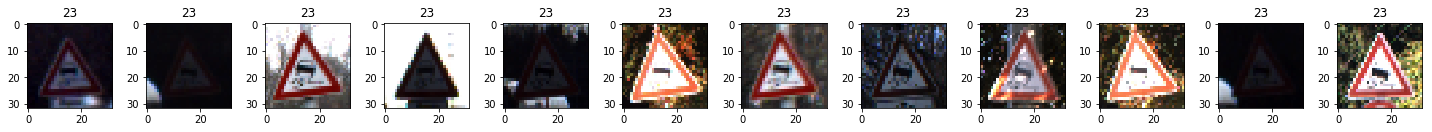

203


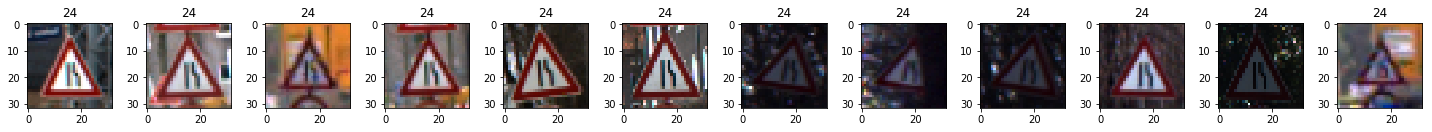

1181


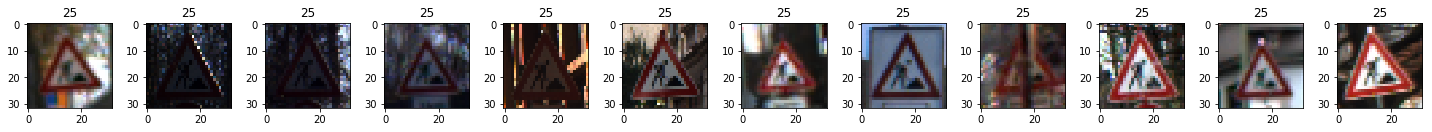

467


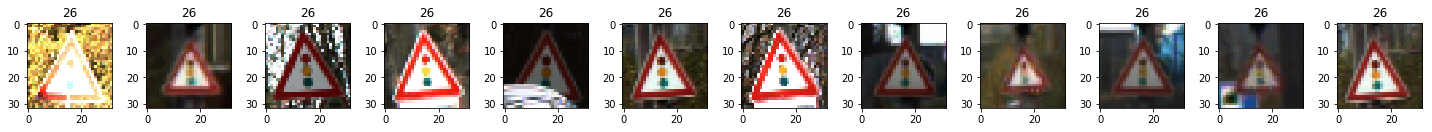

193


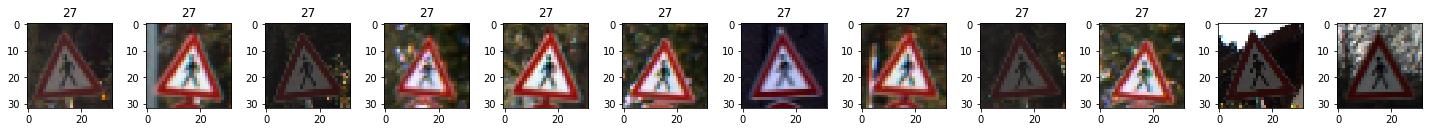

415


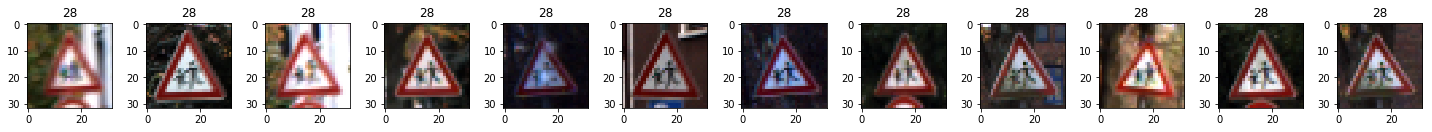

212


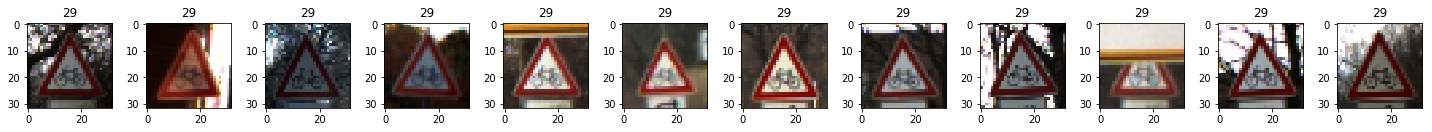

349


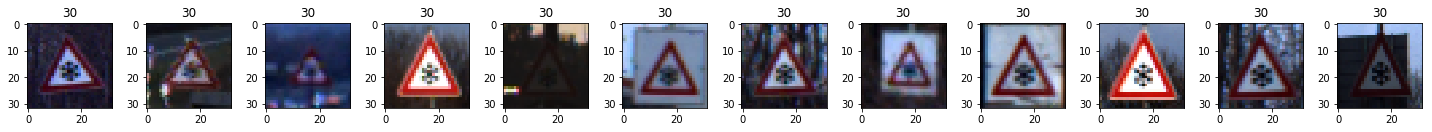

623


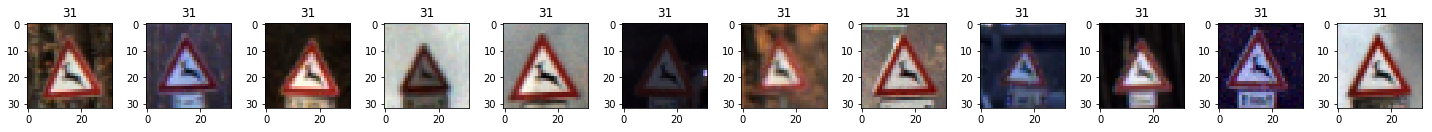

201


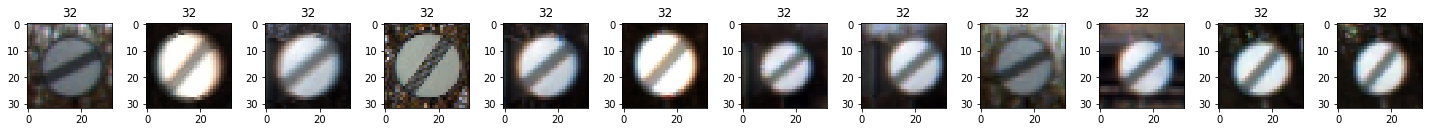

576


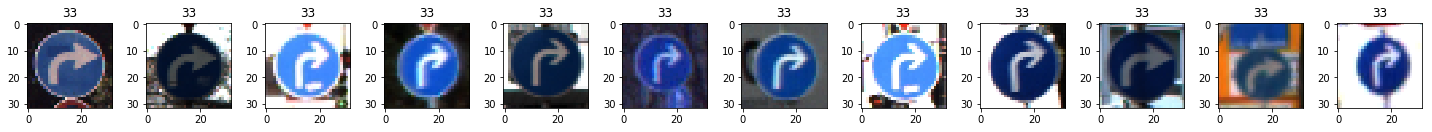

348


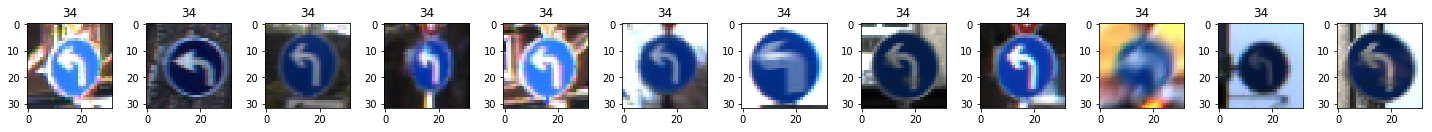

983


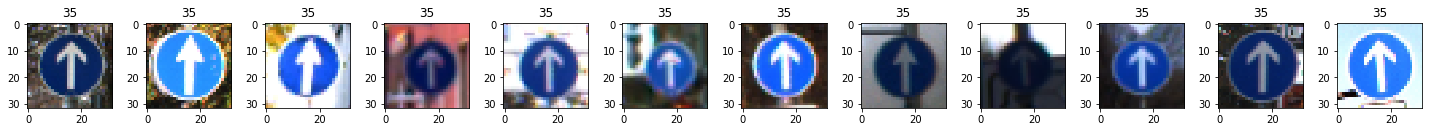

317


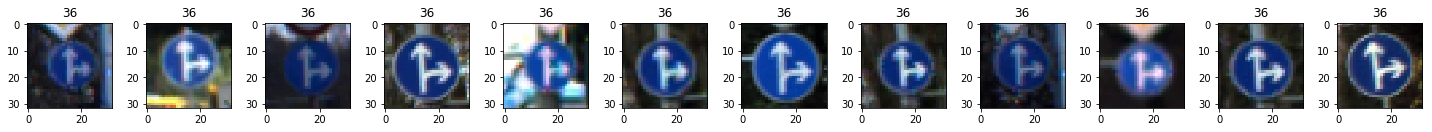

161


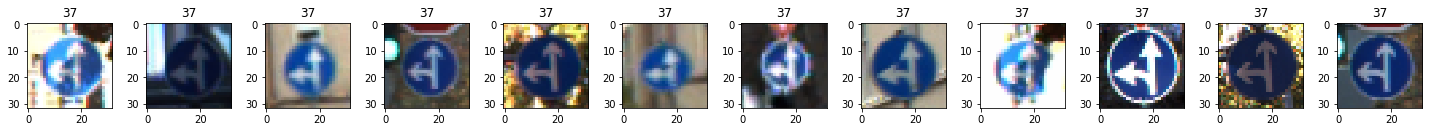

1627


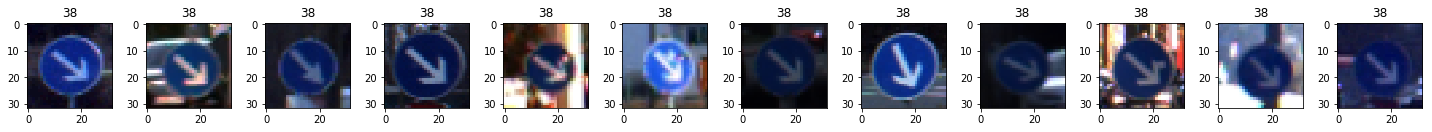

235


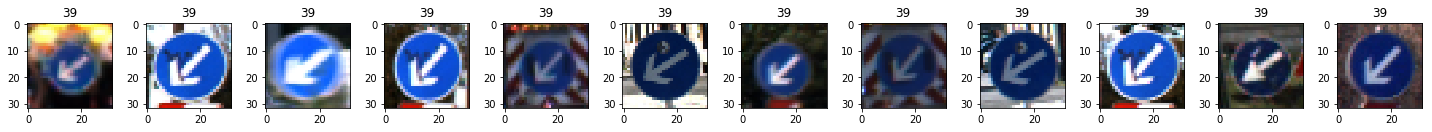

289


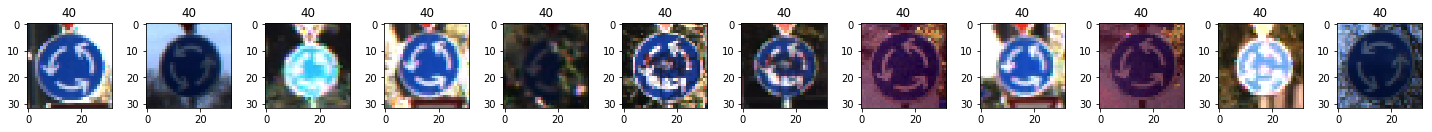

186


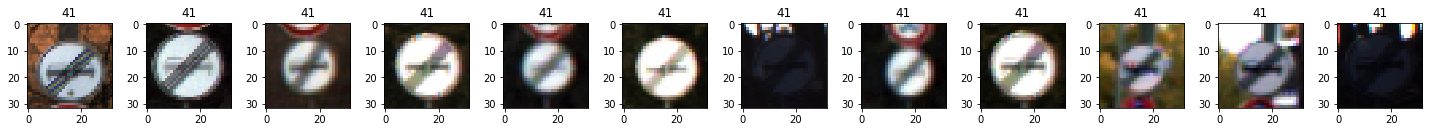

195


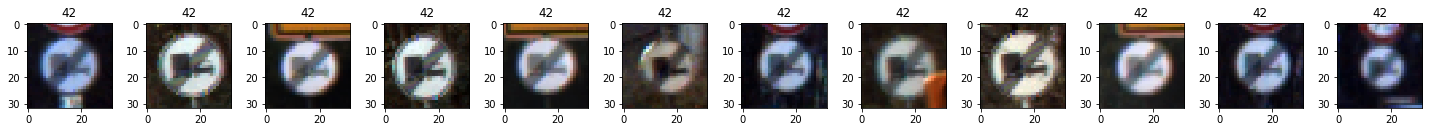

In [6]:
images_labels = list(all_images.keys())
for image_key in images_labels:        
    subplots = 12
    fig, axes = plt.subplots(1,subplots)
    images_total = len(all_images[image_key])
    print(images_total)
    offset = images_total // subplots
    images = [all_images[image_key][j*offset] for j in range(subplots)]
    for i, (image, ax) in enumerate(zip(images, axes)):
        ax.set_title(image_key)
        ax.imshow(image.squeeze())
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

all_images.clear()

In [5]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

# Model Architecture

> Student provides sufficient details of the characteristics and qualities of the architecture, such as the type of model used, the number of layers, the size of each layer. Visualizations emphasizing particular qualities of the architecture are encouraged.

We try two different methods. One of them is the LeNet and observe how much time it takes to:


| Epochs  | training acc  | validation acc  |  
|---|---|---|
| 500  | 0.99  | 0.02  |   
| 200  | 0.97  | 0.63  |  
| 100  | 0.97  | 0.923  |   
  
We select LeNet to begin because of the similarities in the Data. For one the architecture was built for classify digits using 32x32 images, which is the same size we are using and we are also using digits. The main difference with LeNet is that we don't normalize our values to grayscale to keep our depth. 

## Changes

The LeNet layer contains 5 Layers, hence the name LeNet-5. The first layer is a convolution with a 5x5 filter patch of the same depth. We use relu for our activations and max pooling. 

We add two dropouts in the last two layers to prevent overfitting, this felt like overkill and one dropout would have helped without making the learning rate start so slowly.

LeNet is broken down as follows:

 1. Convolution layer (Using 5x5 patch and the 3 filters)
 2. Subsample layer (Activation and max pool with a stride of 2x2)
 3. Convolution layer (Using a 5x5 patch with 6 filters) 
 4. Subsample layer (Another activation using a 2x2 stride to reduce the dimensions)
 5. Fully connected layer to flatten the features and activation
 6. 4th layer fully connected
 7. Activation and relu
 8. 5th layer, we extract our features and apply softmax to convert them to probabilities that add to one.
 
## Improving on LeNet

LeNet turned out to be very fast, but even adding dropouts and changing the parameters it was still very prone to overfitting. We would like to have a network we can continue training without necessarily making it invalid with future data.
 
LeNet worked pretty well, it didn't require much training to make great results. 

We can still extend it using the techniques explained by Vincent Vanhoucke on the Deep Learning course, which is to use all of the path sizes to process and image, then combine those features into one with a bigger depth. This is called inception.

We take a page of the inception module done in the <a href="https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf">GoogLeNet architecture</a>.

![inception module](./inception.png)

The reason we take this inception module is because it applies several techniques to improve the Convolutional Neural Network. It uses multiple patch sizes, also uses 1x1 convolutions to increase the depth of the image, as well as pooling techniques. All of which were mentioned in the Deep Learning course.

![deep learning](./deep-learning.png)

### What is our inception model 

The Inception model is exactly as the one depicted above, we used two. We had a few issues implementing Inception because of the amount of multiplication it uses, the memory in our computer could not allocate enough space for it. To handle this we fine tune each layer by reducing the depth, the only thing we maintain are the patch sizes for the paper. 

We discuss further the inception model on the following section.

# Dataset and Training

> Student describes how the model was trained and evaluated. If the student generated additional data they discuss their process and reasoning. Additionally, the student discusses the difference between the new dataset with additional data, and the original dataset.

We are very interested in how the classifier will work depending on the amount of pictures we have on the label, here are the labels and the amount of images in the dataset.

`[(0, 210), (19, 210), (37, 210), (27, 240), (32, 240), (41, 240), (42, 240), (24, 270), (29, 270), (39, 300), (21, 330), (20, 360), (40, 360), (22, 390), (36, 390), (6, 420), (16, 420), (34, 420), (30, 450), (23, 510), (28, 540), (26, 600), (15, 630), (33, 689), (14, 780), (31, 780), (17, 1110), (18, 1200), (35, 1200), (11, 1320), (3, 1410), (8, 1410), (7, 1440), (9, 1470), (25, 1500), (5, 1860), (4, 1980), (10, 2010), (38, 2070), (12, 2100), (13, 2160), (1, 2220), (2, 2250)]`

We trained the model several times and observe that the accuracy on the validation set does improve:

  - 500 Epochs - 0.937 acc
  - 100 Epochs - 0.917 acc
  - 200 Epochs (current) - 0.932 acc


## Generating new data

We tried generating new data by rotating images by 90 degrees and by 180 degrees. 

What happend is that with the 90 degree image the accuracy would be reduces as expected because some images when rotated look exactly like another label.

Sadly this generation failed to improve the results and it does increase the time it take to run one EPOCH. A good transformation to try out next time since we are using RGB values we could also have multiple brightness levels generated for every image.

# Solution Design

> Student thoroughly discusses the approach taken for deriving and designing a model architecture fit for solving the problem given.

Our solution was picked on a couple of ideas from the course.

First when training LeNet for over 500 Epochs we discovered that it overfitted and when testing with our validation set we received less than 2% Accuracy, a very big hit.

The inception models do handle overfitting very well but the extra matrix operations made the training way longer. Training just one epoch takes close to 5 minutes on a p2.xlarge GPU Compute instance, longer on a g2.2xlarge. We could train the Inception Model to a point where it overfitted the data which would take a bit longer.

The extra images created were discovered to be of little use and would make it harder to train. We also discover that a learning rate of 0.001 or higher would take a long time to improve.

The reasoning behind our selections was that is based on the state of the art and that it combines several techniques already proved. 

# Model Architecture revisited

For our inception model we use the following:

1. Inception Module 
    1. Convolution with 1x1 patch, X Filters
    2. Convolution with 1x1 patch, X/4 Filters 
        2.1 Activation
        2.2 Convolution with 3x3 patch
    3. Convolution with 1x1 patch, X/4 Filters
        3.1 Activation
        3.2 Convolution with 5x5 patch
    4. 3x3 size max pooling
        4.1 Convolution with 1x1 patch 
2. Filter concatenation and activation
3. Repeat Inception, X*2 filters
4. Filter concatenation and activation
5. Flatten the structure and retrieve logits

All filters at the end must be the same size, and we use 'SAME' padding to have the same dimensions at the end, padded with zeros, otherwise we would have to pad our resulting matrices with zeros.

As for the number of filters selected we select X=32 as it would be more manageable for our computer.

In [27]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation and dropout.
    fc1    = tf.nn.relu(fc1)
    fc1  = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation and dropout
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [50]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) 
one_hot_y = tf.one_hot(y, 43)

rate = 0.001
EPOCHS = 100
BATCH_SIZE = 128

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [51]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

        validation_accuracy = evaluate(X_validation, y_validation)
        if i%10 == 0:
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

    saver.save(sess, 'model')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.650

EPOCH 11 ...
Validation Accuracy = 0.924

EPOCH 21 ...
Validation Accuracy = 0.945

EPOCH 31 ...
Validation Accuracy = 0.961

EPOCH 41 ...
Validation Accuracy = 0.963

EPOCH 51 ...
Validation Accuracy = 0.969

EPOCH 61 ...
Validation Accuracy = 0.971

EPOCH 71 ...
Validation Accuracy = 0.961

EPOCH 81 ...
Validation Accuracy = 0.966

EPOCH 91 ...
Validation Accuracy = 0.967

Model saved


In [52]:
def test():
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))

        test_accuracy = evaluate(X_test, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))

In [53]:
test()

Test Accuracy = 0.923


At this point we need to reset the kernel to clean our data.

In [6]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten


def InceptionModel(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    # utility functions to create weights and biases 
    # notice the SAME padding which allows us to not have
    # to worry about maintaining the padding when we do 
    # the filter concatenation, otherwise we would have to 
    # make sure each layer has the same dimensions (5x5 would be 28x28, 3x3 would be 30x30, 1x1 would be 32x32)
    create_weight = lambda shape, name: tf.Variable(tf.truncated_normal(shape=shape, mean=mu, stddev=sigma, name=name))
    create_bias = lambda size, name: tf.Variable(tf.constant(0.1,shape=[size]), name=name)
    conv2d_stride_1x1 = lambda input_x, w: tf.nn.conv2d(input_x, w, strides=[1,1,1,1], padding='SAME')
    
    # Inception 1
    # Sublayer 1 - 32x32x3 -> 1x1 (32,32,32)
    in1_sl1_w = create_weight((1,1,3,16), name='in1_sl1_w')
    in1_sl1_b = create_bias(16, name='in1_sl1_b')
    in1_sl1 = conv2d_stride_1x1(x, in1_sl1_w) + in1_sl1_b
    
    # Sublayer 2 - 32x32x3 -> 1x1 -> 3x3 (30,30,32)
    in1_sl2_1_w = create_weight((1,1,3,8), name='in1_sl2_1_w')
    in1_sl2_1_b = create_bias(8, name='in1_sl2_1_b')
    in1_sl2 = tf.nn.relu(conv2d_stride_1x1(x, in1_sl2_1_w) + in1_sl2_1_b)
    
    in1_sl2_2_w = create_weight((3,3,8,16), name='in1_sl2_2_w')
    in1_sl2_2_b = create_bias(16, name='in1_sl2_2_b')
    in1_sl2 = conv2d_stride_1x1(in1_sl2, in1_sl2_2_w) + in1_sl2_2_b
    
    # Sublayer 3 - 32x32x3 -> 1x1 -> 5x5 (28,28,32)
    in1_sl3_1_w = create_weight((1,1,3,8), name='in1_sl3_1_w')
    in1_sl3_1_b = create_bias(8, name='in1_sl3_1_b')
    in1_sl3 = tf.nn.relu(conv2d_stride_1x1(x, in1_sl3_1_w) + in1_sl3_1_b)
    
    in1_sl3_2_w = create_weight((5,5,8,16), name='in1_sl3_2_w')
    in1_sl3_2_b = create_bias(16, name='in1_sl3_2_b')
    in1_sl3 = conv2d_stride_1x1(in1_sl3, in1_sl3_2_w) + in1_sl3_2_b

    # SubLayer 4 - 32x32x3 -> 3x3 maxpool -> 1x1 (30,30,32)
    in1_sl4 = tf.nn.max_pool(x, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')
    in1_sl4_1_w = create_weight((1,1,3,16), name='in1_sl4_1_w')
    in1_sl4_1_b = create_bias(16, name='in1_sl4_1_b')
    in1_sl4 = conv2d_stride_1x1(in1_sl4, in1_sl4_1_w) + in1_sl4_1_b

    # Concatenate sublayers, add depths
    inception1 = tf.nn.relu(tf.concat(3, [in1_sl1,in1_sl2,in1_sl3,in1_sl4]))
    
    # Inception 2 Same as first inception
    # Sublayer 1 
    in2_sl1_w = create_weight((1,1,64,32), name='in2_sl1_w')
    in2_sl1_b = create_bias(32, name='in2_sl1_b')
    in2_sl1 = conv2d_stride_1x1(inception1, in2_sl1_w) + in2_sl1_b
    
    # Sublayer 2 
    in2_sl2_1_w = create_weight((1,1,64,16), name='in2_sl2_1_w')
    in2_sl2_1_b = create_bias(16, name='in2_sl2_1_b')
    in2_sl2 = tf.nn.relu(conv2d_stride_1x1(inception1, in2_sl2_1_w) + in2_sl2_1_b)
    
    in2_sl2_2_w = create_weight((3,3,16,32), name='in2_sl2_2_w')
    in2_sl2_2_b = create_bias(32, name='in2_sl2_2_b')
    in2_sl2 = conv2d_stride_1x1(in2_sl2, in2_sl2_2_w) + in2_sl2_2_b
    
    # Sublayer 3
    in2_sl3_1_w = create_weight((1,1,64,16), name='in2_sl3_1_w')
    in2_sl3_1_b = create_bias(16, name='in2_sl3_1_b')
    in2_sl3 = tf.nn.relu(conv2d_stride_1x1(inception1, in2_sl3_1_w) + in2_sl3_1_b)
    
    in2_sl3_2_w = create_weight((5,5,16,32), name='in2_sl3_2_w')
    in2_sl3_2_b = create_bias(32, name='in2_sl3_2_b')
    in2_sl3 = conv2d_stride_1x1(in2_sl3, in2_sl3_2_w) + in2_sl3_2_b

    # SubLayer 4
    in2_sl4 = tf.nn.max_pool(x, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')
    in2_sl4_1_w = create_weight((1,1,3,32), name='in2_sl4_1_w')
    in2_sl4_1_b = create_bias(32, name='in2_sl4_1_b')
    in2_sl4 = conv2d_stride_1x1(in2_sl4, in2_sl4_1_w) + in2_sl4_1_b
    
    inception2 = tf.nn.relu(tf.concat(3, [in2_sl1,in2_sl2,in2_sl3,in2_sl4]))
    
    inception2_flat = flatten(inception2)
    s = 32*32*4*32
    fc1_W = create_weight((s, 700), name='fc1_W')
    fc1_b = create_bias(700, name='fc1_b')
    fc1   = tf.matmul(inception2_flat, fc1_W) + fc1_b
    fc1   = tf.nn.relu(fc1)
    fc1   = tf.nn.dropout(fc1, keep_prob)
    
    fc2_W = create_weight((700, 43), name='fc2_W')
    fc2_b = create_bias(43, name='fc2_b')
    logits   = tf.matmul(fc1, fc2_W) + fc2_b
    
    return logits

In [7]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) 
one_hot_y = tf.one_hot(y, 43)

In [10]:
rate = 0.0001 # Reduced learning rate because Inception seems to converge better
EPOCHS = 200
BATCH_SIZE = 50

logits = InceptionModel(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.


In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'inception')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.027

EPOCH 2 ...
Validation Accuracy = 0.068

EPOCH 3 ...
Validation Accuracy = 0.171

EPOCH 4 ...
Validation Accuracy = 0.279

EPOCH 5 ...
Validation Accuracy = 0.388

EPOCH 6 ...
Validation Accuracy = 0.454

EPOCH 7 ...
Validation Accuracy = 0.555

EPOCH 8 ...
Validation Accuracy = 0.638

EPOCH 9 ...
Validation Accuracy = 0.676

EPOCH 10 ...
Validation Accuracy = 0.748

EPOCH 11 ...
Validation Accuracy = 0.799

EPOCH 12 ...
Validation Accuracy = 0.832

EPOCH 13 ...
Validation Accuracy = 0.827

EPOCH 14 ...
Validation Accuracy = 0.841

EPOCH 15 ...
Validation Accuracy = 0.864

EPOCH 16 ...
Validation Accuracy = 0.885

EPOCH 17 ...
Validation Accuracy = 0.898

EPOCH 18 ...
Validation Accuracy = 0.892

EPOCH 19 ...
Validation Accuracy = 0.902

EPOCH 20 ...
Validation Accuracy = 0.897

EPOCH 21 ...
Validation Accuracy = 0.911

EPOCH 22 ...
Validation Accuracy = 0.911

EPOCH 23 ...
Validation Accuracy = 0.914

EPOCH 24 ...
Validation Accura

# Acquiring new images

> Student chooses five candidate images of traffic signs taken and visualizes them in the report. Discussion is made as to any particular qualities of the images or traffic signs in the images that may be of interest, such as whether they would be difficult for the model to classify.

Observing the images we can see that most of them are very similar but with different levels of brightness, contrast, or color in them, which is very useful as it allows our network to train the same image on multiple configurations. 

Out of all of them we can see that maybe we could improve the accurary by having more clear images, but it is something to be experimented with.

We are invested in how the classifier will work depending on the amount of pictures we have on the label, here are the labels and the amount of images in the dataset.

We acquire 18 new images in total to analyze our Inception Model with the following labels: 32,25,3,19,36,7,0,9,1,17,14,18,37,13,2,40,12,38.

We choose these images because some of them are in an angle and some of them **seem** easy to classify.

# Performance on New Images 

> Student documents the performance of the model when tested on the captured images and compares it to the results of testing on the dataset.

  - 100 Epochs 0.778
  - 200 Epochs 0.722 
  
Both results are pretty good the first run of 100 Epochs we obtain the following:

 - For (Label, Instances)
 - For (7, 1440) it predicted (5, 1860)
 - For (0, 210) it predicted (3, 1410)
 - For (14, 780) it predicted (13, 2160)
 - For (2, 2250) it predicted (12, 2100)
 
For 200 Epochs are presented below.

Seems like our model is very confident of it's results as most probabilities return a clear decision on what type of sign is. This is a big disconcerting and we would need research to figure out why is the network so biased.


# Model Certainty Visualization

> The softmax probabilities of the predictions on the captured images are visualized. The student discusses how certain or uncertain the model is of its predictions.

- 0 : Label= 32 ,Predicted= 32 End of all speed and passing limits = 1.0
- 1 : Label= 25 ,Predicted= 25 Road work = 1.0
- 2 : Label= 3 ,Predicted= 2 Speed limit (50km/h) = 1.0
- 3 : Label= 19 ,Predicted= 11 Right-of-way at the next intersection = 1.0
- 4 : Label= 36 ,Predicted= 36 Go straight or right = 1.0
- 5 : Label= 7 ,Predicted= 1 Speed limit (30km/h) = 1.0
- 6 : Label= 0 ,Predicted= 0 Speed limit (20km/h) = 1.0
- 7 : Label= 9 ,Predicted= 9 No passing = 1.0
- 8 : Label= 1 ,Predicted= 1 Speed limit (30km/h) = 1.0
- 9 : Label= 17 ,Predicted= 17 No entry = 1.0
- 10 : Label= 14 ,Predicted= 13 Yield = 1.0
- 11 : Label= 18 ,Predicted= 18 General caution = 1.0
- 12 : Label= 37 ,Predicted= 37 Go straight or left = 1.0
- 13 : Label= 13 ,Predicted= 13 Yield = 1.0
- 14 : Label= 2 ,Predicted= 1 Speed limit (30km/h) = 1.0
- 15 : Label= 40 ,Predicted= 40 Roundabout mandatory = 1.0
- 16 : Label= 12 ,Predicted= 12 Priority road = 1.0
- 17 : Label= 38 ,Predicted= 38 Keep right = 1.0


Counted 5 bad predictions


- For Label 3 it predicted 2
- For Label 19 it predicted 11
- For Label 7 it predicted 1
- For Label 14 it predicted 13
- For Label 2 it predicted 1


It is very interesting to have obtained such different results from 200 Epochs from 100 Epochs, though the weirdest result, our 50 km/h sign, was better predicted on more Epochs. 


# Conclusion

Overall we can see a high value from doing inception modules on Convolution Neural Networks, we need to calibrate our architecture for better use of our resources and to find out the point on which the inception modules will start to overfit for our training data. 

We also need to be careful on the input data, extending our data turned out mostly in bad results that would make it harder for the networks to give good results. Garbage in garbage out.

(32, 32, 3)
18


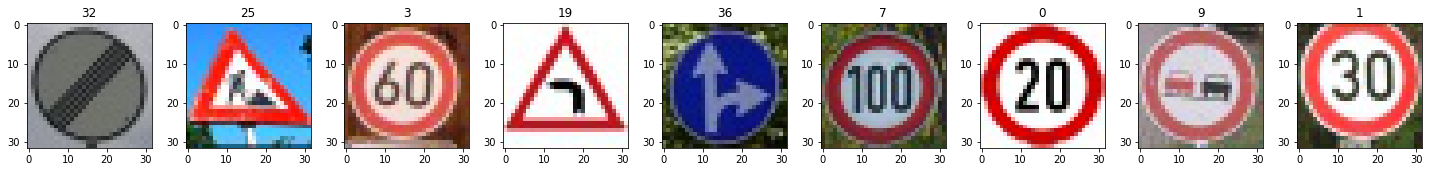

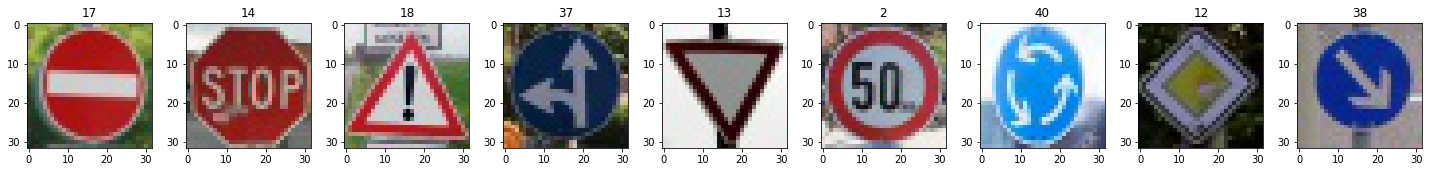

In [14]:
import os

dir = './private'
local_files = os.listdir(dir)

local_labels = [i.partition("-")[0] for i in local_files]
files = [dir + '/' + f for f in local_files]
local_images = [cv2.imread(f, 3) for f in files]
for i in range(len(local_images)):
    b,g,r = cv2.split(local_images[i]) 
    local_images[i] = cv2.merge([r,g,b])

print(local_images[0].shape)
print(len(local_images))

mini_batch_size = 9
for start in range(0, len(local_images), mini_batch_size): 
    end = start+mini_batch_size 
    end = end if end < len(local_images) else len(local_images)
    mini_batch_size = end - start
    fig, axes = plt.subplots(1,mini_batch_size)
    end = start+mini_batch_size
    for i, ((image, ax), label) in enumerate(zip(zip(local_images[start:end], axes), local_labels[start:end])):
        ax.set_title(label)
        ax.imshow(image.squeeze())

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    private_images_accuracy = evaluate(local_images, local_labels)
    print("My Images Accuracy = {:.3f}".format(private_images_accuracy))
    
    softmax = tf.nn.softmax(logits)
    probs = sess.run(softmax, feed_dict={x: local_images, y: local_labels, keep_prob: 1})

Test Accuracy = 0.932
My Images Accuracy = 0.722


In [19]:
labels_text = {
    0:"Speed limit (20km/h)",
    1:"Speed limit (30km/h)",
    2:"Speed limit (50km/h)",
    3:"Speed limit (60km/h)",
    4:"Speed limit (70km/h)",
    5:"Speed limit (80km/h)",
    6:"End of speed limit (80km/h)",
    7:"Speed limit (100km/h)",
    8:"Speed limit (120km/h)",
    9:"No passing",
    10:"No passing for vehicles over 3.5 metric tons",
    11:"Right-of-way at the next intersection",
    12:"Priority road",
    13:"Yield",
    14:"Stop",
    15:"No vehicles",
    16:"Vehicles over 3.5 metric tons prohibited",
    17:"No entry",
    18:"General caution",
    19:"Dangerous curve to the left",
    20:"Dangerous curve to the right",
    21:"Double curve",
    22:"Bumpy road",
    23:"Slippery road",
    24:"Road narrows on the right",
    25:"Road work",
    26:"Traffic signals",
    27:"Pedestrians",
    28:"Children crossing",
    29:"Bicycles crossing",
    30:"Beware of ice/snow",
    31:"Wild animals crossing",
    32:"End of all speed and passing limits",
    33:"Turn right ahead",
    34:"Turn left ahead",
    35:"Ahead only",
    36:"Go straight or right",
    37:"Go straight or left",
    38:"Keep right",
    39:"Keep left",
    40:"Roundabout mandatory",
    41:"End of no passing",
    42:"End of no passing by vehicles over 3.5 metric tons",
}

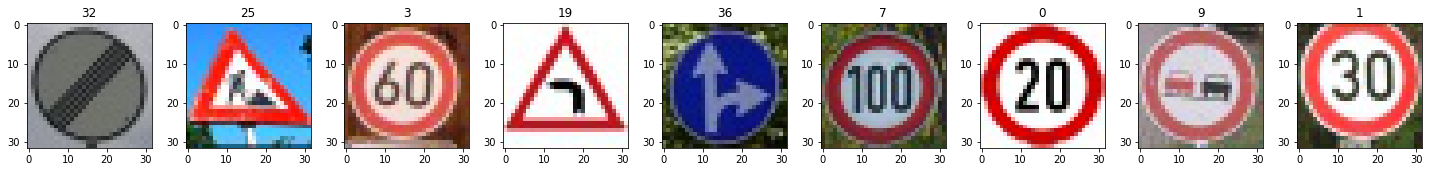

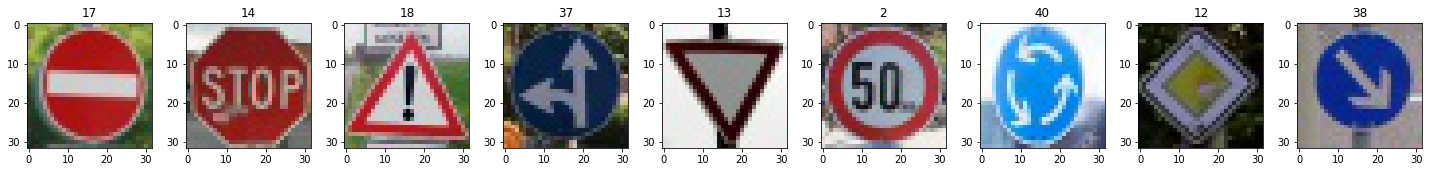

0 : Label= 32 ,Predicted= 32 End of all speed and passing limits = 1.0
1 : Label= 25 ,Predicted= 25 Road work = 1.0
2 : Label= 3 ,Predicted= 2 Speed limit (50km/h) = 1.0
3 : Label= 19 ,Predicted= 11 Right-of-way at the next intersection = 1.0
4 : Label= 36 ,Predicted= 36 Go straight or right = 1.0
5 : Label= 7 ,Predicted= 1 Speed limit (30km/h) = 1.0
6 : Label= 0 ,Predicted= 0 Speed limit (20km/h) = 1.0
7 : Label= 9 ,Predicted= 9 No passing = 1.0
8 : Label= 1 ,Predicted= 1 Speed limit (30km/h) = 1.0
9 : Label= 17 ,Predicted= 17 No entry = 1.0
10 : Label= 14 ,Predicted= 13 Yield = 1.0
11 : Label= 18 ,Predicted= 18 General caution = 1.0
12 : Label= 37 ,Predicted= 37 Go straight or left = 1.0
13 : Label= 13 ,Predicted= 13 Yield = 1.0
14 : Label= 2 ,Predicted= 1 Speed limit (30km/h) = 1.0
15 : Label= 40 ,Predicted= 40 Roundabout mandatory = 1.0
16 : Label= 12 ,Predicted= 12 Priority road = 1.0
17 : Label= 38 ,Predicted= 38 Keep right = 1.0
Counted 5 bad predictions


In [20]:

mini_batch_size = 9
for start in range(0, len(local_images), mini_batch_size): 
    end = start+mini_batch_size 
    end = end if end < len(local_images) else len(local_images)
    mini_batch_size = end - start
    fig, axes = plt.subplots(1,mini_batch_size)
    end = start+mini_batch_size
    for i, ((image, ax), label) in enumerate(zip(zip(local_images[start:end], axes), local_labels[start:end])):
        ax.set_title(label)
        ax.imshow(image.squeeze())

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

count = 0
for image_prob in range(len(probs)):
    probabilities = probs[image_prob]
    for i in range(len(probabilities)):
        if probabilities[i] > 0.5:
            print(image_prob, ':', 'Label=', local_labels[image_prob], ',Predicted=', i, labels_text[i], '=', probabilities[i])
            if int(local_labels[image_prob]) != int(i):
                count += 1

print('Counted', count, 'bad predictions')

In [24]:
print(probs[0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
